# Viator End of Year Analytics

In [1]:
import sys
sys.path.append('../../')
from env import conn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def execute_query(query):
    try:
        cur = conn.cursor()
        cur.execute(query)

        df = pd.DataFrame(cur.fetchall(), columns=[col[0] for col in cur.description])
        return df
    finally:
        cur.close()

In [4]:
query = """select * from PROD.BINK_SECURE.FACT_TRANSACTION
        where loyalty_plan_company = 'Viator'
         order by event_date_time;"""

df = execute_query(query)

In [5]:
df.head()

,EVENT_ID,EVENT_DATE_TIME,USER_ID,EXTERNAL_USER_REF,CHANNEL,BRAND,TRANSACTION_ID,PROVIDER_SLUG,FEED_TYPE,DUPLICATE_TRANSACTION,...,SPEND_CURRENCY,LOYALTY_ID,LOYALTY_CARD_ID,MERCHANT_ID,PAYMENT_ACCOUNT_ID,SETTLEMENT_KEY,AUTH_CODE,APPROVAL_CODE,INSERTED_DATE_TIME,UPDATED_DATE_TIME
0,508949,2022-08-18 17:20:17.786535,597581,,BINK,BINK,482230624134864,bpl-viator,None,False,...,GBP,9e23f43c-3e6d-43ee-80ed-458f6fd5ba3b,419072,020150514,151060,None,None,None,2023-11-27 11:44:28.631,2023-11-27 11:44:28.631
1,512003,2022-08-19 14:17:44.313373,597581,,BINK,BINK,482231514606471,bpl-viator,None,False,...,GBP,9e23f43c-3e6d-43ee-80ed-458f6fd5ba3b,419072,020150514,151060,None,None,None,2023-11-27 11:44:28.631,2023-11-27 11:44:28.631
2,513882,2022-08-20 07:24:08.667430,597581,,BINK,BINK,632231476961839,bpl-viator,REFUND,False,...,GBP,9e23f43c-3e6d-43ee-80ed-458f6fd5ba3b,419072,020150514,151060,53cf47f120519be3cdd1ba73eef6e0ec0144f99813d955...,None,None,2023-11-27 11:44:28.631,2023-11-27 11:44:28.631
3,514497,2022-08-20 08:53:50.120120,597581,,BINK,BINK,482230390763357,bpl-viator,None,False,...,GBP,9e23f43c-3e6d-43ee-80ed-458f6fd5ba3b,419072,020150514,151060,None,None,None,2023-11-27 11:44:28.631,2023-11-27 11:44:28.631
4,515334,2022-08-20 14:01:43.659954,597581,,BINK,BINK,MCCDTKOBX,bpl-viator,None,False,...,GBP,9e23f43c-3e6d-43ee-80ed-458f6fd5ba3b,419072,020150514,351565,None,None,None,2023-11-27 11:44:28.631,2023-11-27 11:44:28.631


In [6]:
df.describe()

,EVENT_ID,EVENT_DATE_TIME,TRANSACTION_DATE,SPEND_AMOUNT,INSERTED_DATE_TIME,UPDATED_DATE_TIME
count,8.710000e+02,871,871,871.000000,871,871
mean,7.989320e+06,2023-05-30 06:10:37.311934208,2023-05-28 19:28:45.833524736,64.522836,2023-11-27 14:19:08.847066112,2023-11-27 14:19:08.847066112
min,5.089490e+05,2022-08-18 17:20:17.786535,2022-08-17 14:35:00,-796.410000,2023-11-27 11:44:28.631000,2023-11-27 11:44:28.631000
25%,4.844182e+06,2023-04-11 22:14:00.768653568,2023-04-11 22:13:54.500000,-1.000000,2023-11-27 11:44:28.631000064,2023-11-27 11:44:28.631000064
50%,8.270204e+06,2023-06-28 04:49:50.829016064,2023-06-28 04:49:48,15.000000,2023-11-27 11:44:28.631000064,2023-11-27 11:44:28.631000064
75%,1.155502e+07,2023-09-03 10:36:40.420890624,2023-08-31 23:53:40,106.095000,2023-11-27 11:44:28.631000064,2023-11-27 11:44:28.631000064
max,1.638725e+07,2023-12-06 15:21:25.244381,2023-12-06 15:03:42,1679.480000,2023-12-07 02:15:42.293000,2023-12-07 02:15:42.293000
std,4.640152e+06,NaN,NaN,172.391393,NaN,NaN


In [7]:
df.columns

Index(['EVENT_ID', 'EVENT_DATE_TIME', 'USER_ID', 'EXTERNAL_USER_REF',
       'CHANNEL', 'BRAND', 'TRANSACTION_ID', 'PROVIDER_SLUG', 'FEED_TYPE',
       'DUPLICATE_TRANSACTION', 'LOYALTY_PLAN_NAME', 'LOYALTY_PLAN_COMPANY',
       'TRANSACTION_DATE', 'SPEND_AMOUNT', 'SPEND_CURRENCY', 'LOYALTY_ID',
       'LOYALTY_CARD_ID', 'MERCHANT_ID', 'PAYMENT_ACCOUNT_ID',
       'SETTLEMENT_KEY', 'AUTH_CODE', 'APPROVAL_CODE', 'INSERTED_DATE_TIME',
       'UPDATED_DATE_TIME'],
      dtype='object')

In [8]:
df["EXTERNAL_USER_REF"] = df["EXTERNAL_USER_REF"].apply(hash)

df_agg = df.groupby(by="EXTERNAL_USER_REF", ).agg(
    TRANSACTION_ID_count=('TRANSACTION_ID', 'count'),
    SPEND_AMOUNT_sum = ('SPEND_AMOUNT','sum'),
    SPEND_AMOUNT_mean = ('SPEND_AMOUNT','mean'),
    SPEND_AMOUNT_min = ('SPEND_AMOUNT','min', ),
    SPEND_AMOUNT_max = ('SPEND_AMOUNT','max', ),
    SPEND_AMOUNT_range = ('SPEND_AMOUNT',lambda x: x.max() - x.min()),
    EVENT_DATE_TIME_range = ('EVENT_DATE_TIME', lambda x: (x.max() - x.min()).days),
    EVENT_DATE_TIME_max = ('EVENT_DATE_TIME', 'min'),
    EVENT_DATE_TIME_min = ('EVENT_DATE_TIME', 'max'),
)

df_agg.describe()

,TRANSACTION_ID_count,SPEND_AMOUNT_sum,SPEND_AMOUNT_mean,SPEND_AMOUNT_min,SPEND_AMOUNT_max,SPEND_AMOUNT_range,EVENT_DATE_TIME_range,EVENT_DATE_TIME_max,EVENT_DATE_TIME_min
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253,253
mean,3.442688,222.131976,109.405632,64.190000,171.312688,107.122688,20.256917,2023-07-07 08:20:13.640918528,2023-07-27 20:16:34.893089792
min,1.000000,-335.460000,-43.820000,-796.410000,-43.820000,0.000000,0.000000,2022-08-18 17:20:17.786535,2022-10-07 16:18:45.107418
25%,1.000000,39.300000,20.012000,-1.000000,47.940000,0.000000,0.000000,2023-05-08 18:38:44.444780032,2023-05-27 02:16:49.293405952
50%,2.000000,118.000000,59.226667,27.960000,114.000000,2.000000,0.000000,2023-07-02 23:28:40.473444096,2023-08-01 19:22:24.168883968
75%,3.000000,278.010000,131.440000,105.270000,209.420000,119.530000,15.000000,2023-08-29 10:17:18.997880064,2023-09-24 20:48:40.970875904
max,177.000000,2048.360000,1679.480000,1679.480000,1679.480000,1592.820000,444.000000,2023-12-05 00:07:40.338953,2023-12-06 15:21:25.244381
std,11.270558,318.802189,169.746212,199.333286,206.665566,210.498017,49.599839,NaN,NaN


In [9]:
df_agg.columns

Index(['TRANSACTION_ID_count', 'SPEND_AMOUNT_sum', 'SPEND_AMOUNT_mean',
       'SPEND_AMOUNT_min', 'SPEND_AMOUNT_max', 'SPEND_AMOUNT_range',
       'EVENT_DATE_TIME_range', 'EVENT_DATE_TIME_max', 'EVENT_DATE_TIME_min'],
      dtype='object')

In [10]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, -9178903831604438023 to 9165068457544908567
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   TRANSACTION_ID_count   253 non-null    int64         
 1   SPEND_AMOUNT_sum       253 non-null    float64       
 2   SPEND_AMOUNT_mean      253 non-null    float64       
 3   SPEND_AMOUNT_min       253 non-null    float64       
 4   SPEND_AMOUNT_max       253 non-null    float64       
 5   SPEND_AMOUNT_range     253 non-null    float64       
 6   EVENT_DATE_TIME_range  253 non-null    int64         
 7   EVENT_DATE_TIME_max    253 non-null    datetime64[ns]
 8   EVENT_DATE_TIME_min    253 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(2)
memory usage: 19.8 KB


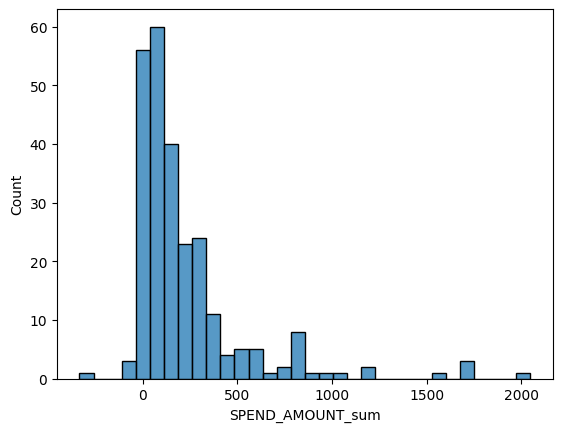

In [11]:
plot = sns.histplot(data=df_agg, x=df_agg['SPEND_AMOUNT_sum'])

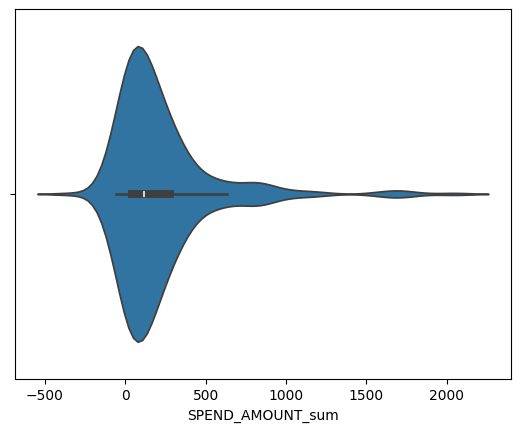

In [12]:
plot = sns.violinplot(data=df_agg, x=df_agg['SPEND_AMOUNT_sum'])

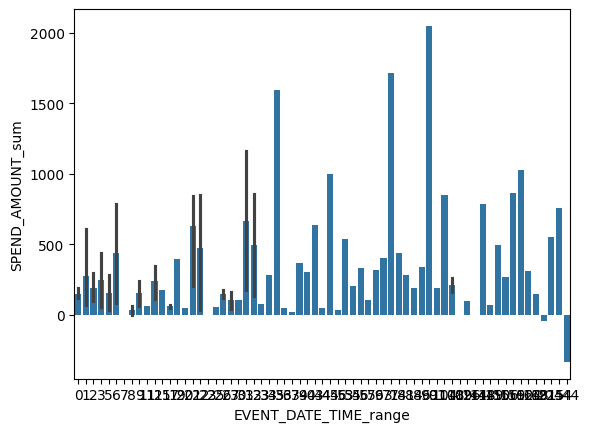

In [13]:
plot = sns.barplot(data=df_agg, x=df_agg['EVENT_DATE_TIME_range'], y=df_agg['SPEND_AMOUNT_sum'])

<Axes: >

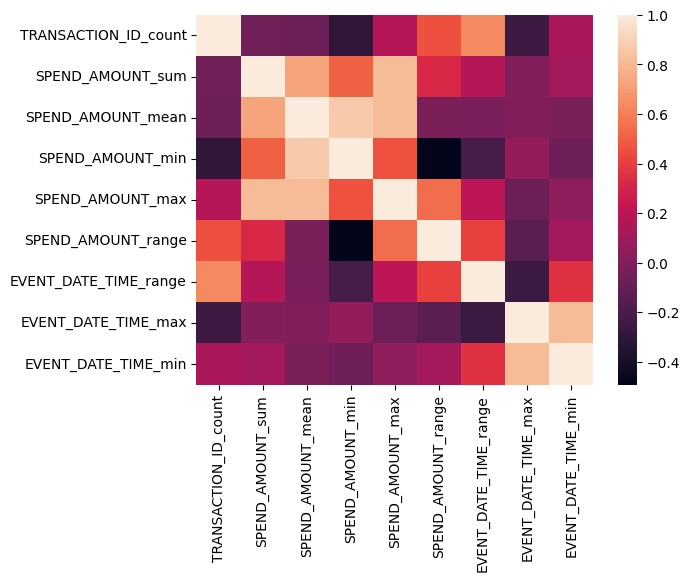

In [14]:
corr = df_agg.corr()
sns.heatmap(corr)

## A detailed dive into the use of BNPL functionality in Viator

In [15]:
query = """WITH bnpl_users AS (
    SELECT DISTINCT user_id
    FROM metrics_staging.transformation.txns_trans
    WHERE status = 'BNPL'),

     bnpl_txns AS (
         SELECT *
         FROM metrics_staging.transformation.txns_trans
         WHERE user_id IN (
             SELECT user_id
             FROM bnpl_users))

SELECT *
FROM bnpl_txns
WHERE loyalty_plan_company = 'Viator'
AND USER_ID != 597581
ORDER BY date"""

df = execute_query(query)

In [16]:
df.head()

,DATE,USER_ID,CHANNEL,BRAND,USER_REF,TRANSACTION_ID,DUPLICATE_TRANSACTION,FEED_TYPE,LOYALTY_PLAN_NAME,LOYALTY_PLAN_COMPANY,TRANSACTION_DATE,SPEND_AMOUNT,LOYALTY_CARD_ID,STATUS
0,2023-02-15 17:07:13.389690,929478,LLOYDS,LLOYDS,LTBCC425361,483046616316202,False,None,Viator Discounts,Viator,2023-02-15 17:07:11,1.00,463745,BNPL
1,2023-02-15 17:07:14.402415,929478,LLOYDS,LLOYDS,LTBCC425361,483046616316202,False,REFUND,Viator Discounts,Viator,2023-02-15 17:07:12,-1.00,463745,BNPL
2,2023-02-15 17:07:40.999569,929478,LLOYDS,LLOYDS,LTBCC425361,483046616596439,False,None,Viator Discounts,Viator,2023-02-15 17:07:39,141.52,463745,TXNS
3,2023-03-05 15:08:47.108515,933230,LLOYDS,LLOYDS,LTBDW803796,483064545255977,False,None,Viator Discounts,Viator,2023-03-05 15:08:45,1.00,464083,BNPL
4,2023-03-05 15:08:48.846382,933230,LLOYDS,LLOYDS,LTBDW803796,483064545255977,False,REFUND,Viator Discounts,Viator,2023-03-05 15:08:47,-1.00,464083,BNPL


In [17]:
df.describe()

,DATE,TRANSACTION_DATE,SPEND_AMOUNT
count,384,384,384.000000
mean,2023-07-30 01:17:00.427342848,2023-07-28 07:32:55.234374912,42.678672
min,2023-02-15 17:07:13.389690,2023-02-15 17:07:11,-796.410000
25%,2023-05-29 22:47:52.490163200,2023-05-29 22:47:49.750000128,-1.000000
50%,2023-07-28 08:50:26.299441408,2023-07-28 08:49:52.500000,1.000000
75%,2023-09-16 12:07:04.949331712,2023-09-10 21:29:25.750000128,28.132500
max,2023-12-06 15:21:25.244381,2023-12-06 15:03:42,1000.000000
std,NaN,NaN,133.055804


- avg non bnpl user spend amount (excluding bnpl txns) £100.70
-  avg bnpl user (excluding bnpl txns) £81.69

(from sql analytics not in report)

In [18]:
df2 = df.drop(columns=['CHANNEL','BRAND','LOYALTY_PLAN_COMPANY','LOYALTY_PLAN_NAME','USER_ID','DATE'])

In [19]:
df2.head()

,USER_REF,TRANSACTION_ID,DUPLICATE_TRANSACTION,FEED_TYPE,TRANSACTION_DATE,SPEND_AMOUNT,LOYALTY_CARD_ID,STATUS
0,LTBCC425361,483046616316202,False,None,2023-02-15 17:07:11,1.00,463745,BNPL
1,LTBCC425361,483046616316202,False,REFUND,2023-02-15 17:07:12,-1.00,463745,BNPL
2,LTBCC425361,483046616596439,False,None,2023-02-15 17:07:39,141.52,463745,TXNS
3,LTBDW803796,483064545255977,False,None,2023-03-05 15:08:45,1.00,464083,BNPL
4,LTBDW803796,483064545255977,False,REFUND,2023-03-05 15:08:47,-1.00,464083,BNPL


<Axes: xlabel='SPEND_AMOUNT', ylabel='Count'>

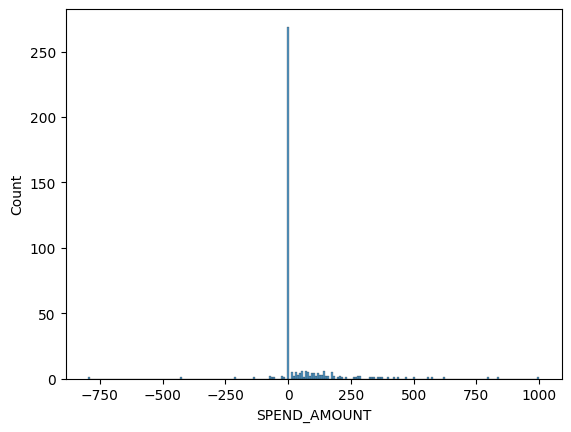

In [20]:
sns.histplot(data=df2, x='SPEND_AMOUNT')

In [21]:
df2.drop(df2.loc[df['STATUS']=='BNPL'].index, inplace=True)

<Axes: xlabel='SPEND_AMOUNT', ylabel='Count'>

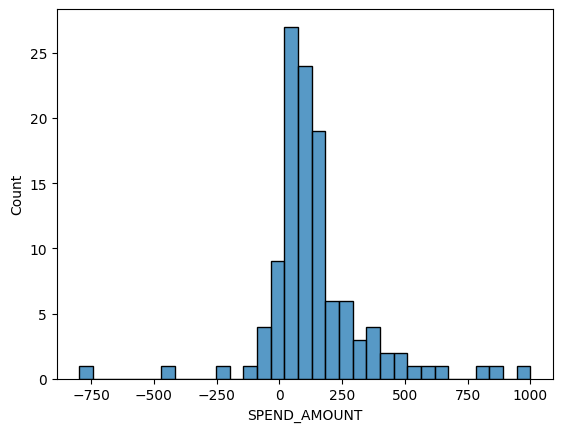

In [22]:
sns.histplot(data=df2, x='SPEND_AMOUNT')

What we can see here is a large volume of low value transactions as part of the BNPL with outliers on the high and low end. These are solely the follow up transactions after the authorisation transactions.
We can also see a significant volume of transactions have been refunded, given the low total volume of transactions.

In [23]:
df2.describe()

,TRANSACTION_DATE,SPEND_AMOUNT
count,116,116.000000
mean,2023-08-11 13:30:25.870689536,141.384569
min,2023-02-15 17:07:39,-796.410000
25%,2023-06-27 04:27:56.750000128,47.955000
50%,2023-08-14 11:26:33.500000,104.715000
75%,2023-10-19 10:30:28.500000,183.035000
max,2023-12-06 15:03:42,1000.000000
std,NaN,211.844002


USER ID = '597581' IS AN LUAT USER AND HAS ABOUT 1/5th TXNS IN DATABASE

Next Actions

- [ ] Remove LUAT Users from Prod Data
- [ ] Rerun models
- [ ] Implement LR/SVM for future Joins/Adds
- [ ] Run RMF on Transactions